<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/ver%205.2/wat_r1_model-v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [5]:
dfgurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r1-good.csv?token=AKVFSODHIHS4LLKHYAMU6PK6XFSJG"
dfmurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r1-mal.csv?token=AKVFSODGM4UD3YONYM7GQG26XFR4I"

dfg = pd.read_csv(dfgurl)
dfm = pd.read_csv(dfmurl)

In [6]:
dfg

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,...,hop_count,current_hop,hop_percentage,waiting_time,pkt_count,pkt_count_inc,pkt_max,counting_index_pos,counting_index_100,target
0,11,2,4,0,0,3,2,8,0,0,...,4,1,0.250000,8,6,1,6,6,36,1
1,83,4,2,3,0,0,4,16,18,2,...,2,1,0.500000,9,5,2,6,10,60,1
2,84,4,2,3,1,1,4,16,18,2,...,2,1,0.500000,10,4,3,6,12,72,1
3,85,4,2,3,2,1,4,16,18,2,...,2,1,0.500000,11,3,4,6,12,72,1
4,86,4,2,3,3,1,4,16,18,2,...,2,1,0.500000,12,2,5,6,10,60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50096,3251158,2,4,4,1,1,2,8,0,0,...,3,1,0.333333,15,5,8,12,40,480,1
50097,3251165,2,4,4,2,1,2,8,0,0,...,3,1,0.333333,22,4,9,12,36,432,1
50098,3251172,2,4,4,3,1,2,8,0,0,...,3,1,0.333333,29,3,10,12,30,360,1
50099,3251179,2,4,4,4,2,2,8,0,0,...,3,1,0.333333,36,2,11,12,22,264,1


In [7]:
dfm

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,...,hop_count,current_hop,hop_percentage,waiting_time,pkt_count,pkt_count_inc,pkt_max,counting_index_pos,counting_index_100,target
0,7,2,0,0,0,3,2,8,1,1,...,3,0,0.00,4,7,1,7,7,49,0
1,11,2,4,0,0,3,2,8,0,0,...,4,1,0.25,8,6,2,7,12,84,0
2,79,0,2,3,0,0,4,16,18,2,...,1,1,1.00,9,5,3,7,15,105,0
3,80,0,2,3,1,1,4,16,18,2,...,1,1,1.00,10,4,4,7,16,112,0
4,81,0,2,3,2,1,4,16,18,2,...,1,1,1.00,11,3,5,7,15,105,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71836,2022096,4,0,4,1,1,2,10,1,1,...,5,0,0.00,11,1,1,1,1,1,0
71837,2022103,4,0,4,2,1,2,10,1,1,...,5,0,0.00,18,1,1,1,1,1,0
71838,2022110,4,0,4,3,1,2,10,1,1,...,5,0,0.00,25,1,1,1,1,1,0
71839,2022117,4,0,4,4,2,2,10,1,1,...,5,0,0.00,32,1,1,1,1,1,0


In [8]:
df = dfg.append(dfm, ignore_index=True,sort=False)

In [9]:
df.isnull().sum()

time                  0
outport               0
inport                0
packet_type           0
flit_id               0
flit_type             0
vnet                  0
vc                    0
src_ni                0
src_router            0
dst_ni                0
dst_router            0
pkt_chuck             0
hop_count             0
current_hop           0
hop_percentage        0
waiting_time          0
pkt_count             0
pkt_count_inc         0
pkt_max               0
counting_index_pos    0
counting_index_100    0
target                0
dtype: int64

In [10]:
df = df.sort_values('time')
df.to_csv('wat-r1-model.csv',index=False)

In [11]:
df = pd.read_csv("wat-r1-model.csv")
df

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,...,hop_count,current_hop,hop_percentage,waiting_time,pkt_count,pkt_count_inc,pkt_max,counting_index_pos,counting_index_100,target
0,7,2,0,0,0,3,2,8,1,1,...,3,0,0.000000,4,7,1,7,7,49,0
1,11,2,4,0,0,3,2,8,0,0,...,4,1,0.250000,8,6,2,7,12,84,0
2,11,2,4,0,0,3,2,8,0,0,...,4,1,0.250000,8,6,1,6,6,36,1
3,79,0,2,3,0,0,4,16,18,2,...,1,1,1.000000,9,5,3,7,15,105,0
4,80,0,2,3,1,1,4,16,18,2,...,1,1,1.000000,10,4,4,7,16,112,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121937,3251158,2,4,4,1,1,2,8,0,0,...,3,1,0.333333,15,5,8,12,40,480,1
121938,3251165,2,4,4,2,1,2,8,0,0,...,3,1,0.333333,22,4,9,12,36,432,1
121939,3251172,2,4,4,3,1,2,8,0,0,...,3,1,0.333333,29,3,10,12,30,360,1
121940,3251179,2,4,4,4,2,2,8,0,0,...,3,1,0.333333,36,2,11,12,22,264,1


In [12]:
df.corr()

,time,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,...,hop_count,current_hop,hop_percentage,waiting_time,pkt_count,pkt_count_inc,pkt_max,counting_index_pos,counting_index_100,target
time,1.000000,0.073879,0.159607,0.020055,0.011723,-0.018399,-0.051942,-0.066694,-0.087413,-0.114742,...,0.070043,-0.014883,-0.016006,0.043093,-0.150317,-0.150294,-0.200676,-0.162504,-0.136745,0.389502
outport,0.073879,1.000000,-0.171157,-0.202169,-0.000862,0.001354,0.322011,0.353165,-0.108261,-0.262553,...,0.145628,-0.378038,-0.517605,-0.321455,-0.122135,-0.027746,-0.100055,-0.091980,-0.083940,0.217451
inport,0.159607,-0.171157,1.000000,0.008037,-0.015220,0.023905,-0.413283,-0.519151,-0.467346,-0.252382,...,0.483866,0.368555,0.435760,0.410964,-0.102964,-0.204721,-0.205400,-0.160672,-0.127414,0.327401
packet_type,0.020055,-0.202169,0.008037,1.000000,0.260563,-0.409233,-0.233214,-0.266011,0.109969,0.032884,...,-0.088940,0.097141,0.158695,-0.166409,0.075646,-0.045867,0.019879,0.035161,0.035754,-0.010188
flit_id,0.011723,-0.000862,-0.015220,0.260563,1.000000,0.063686,0.155673,0.117454,0.004319,0.001608,...,-0.039891,-0.027415,-0.020030,0.389739,-0.063662,0.082465,0.012552,0.010083,0.004281,0.006536
flit_type,-0.018399,0.001354,0.023905,-0.409233,0.063686,1.000000,-0.244496,-0.184471,-0.006784,-0.002525,...,0.062651,0.043057,0.031459,0.489382,-0.064057,0.118032,0.036032,0.010854,0.009571,-0.010265
vnet,-0.051942,0.322011,-0.413283,-0.233214,0.155673,-0.244496,1.000000,0.968480,0.610828,0.366666,...,-0.277171,0.039630,-0.041159,-0.460507,-0.010017,0.100551,0.060437,0.037208,0.017209,-0.051954
vc,-0.066694,0.353165,-0.519151,-0.266011,0.117454,-0.184471,0.968480,1.000000,0.589522,0.309887,...,-0.337367,-0.076519,-0.155651,-0.477648,-0.006209,0.133525,0.084992,0.059319,0.037651,-0.078370
src_ni,-0.087413,-0.108261,-0.467346,0.109969,0.004319,-0.006784,0.610828,0.589522,1.000000,0.655230,...,-0.386319,0.375855,0.365910,-0.298918,0.096626,0.129790,0.151147,0.124229,0.095636,-0.119746
src_router,-0.114742,-0.262553,-0.252382,0.032884,0.001608,-0.002525,0.366666,0.309887,0.655230,1.000000,...,0.139759,0.768263,0.458637,0.014133,0.080274,0.035142,0.077048,0.043968,0.022547,-0.246502


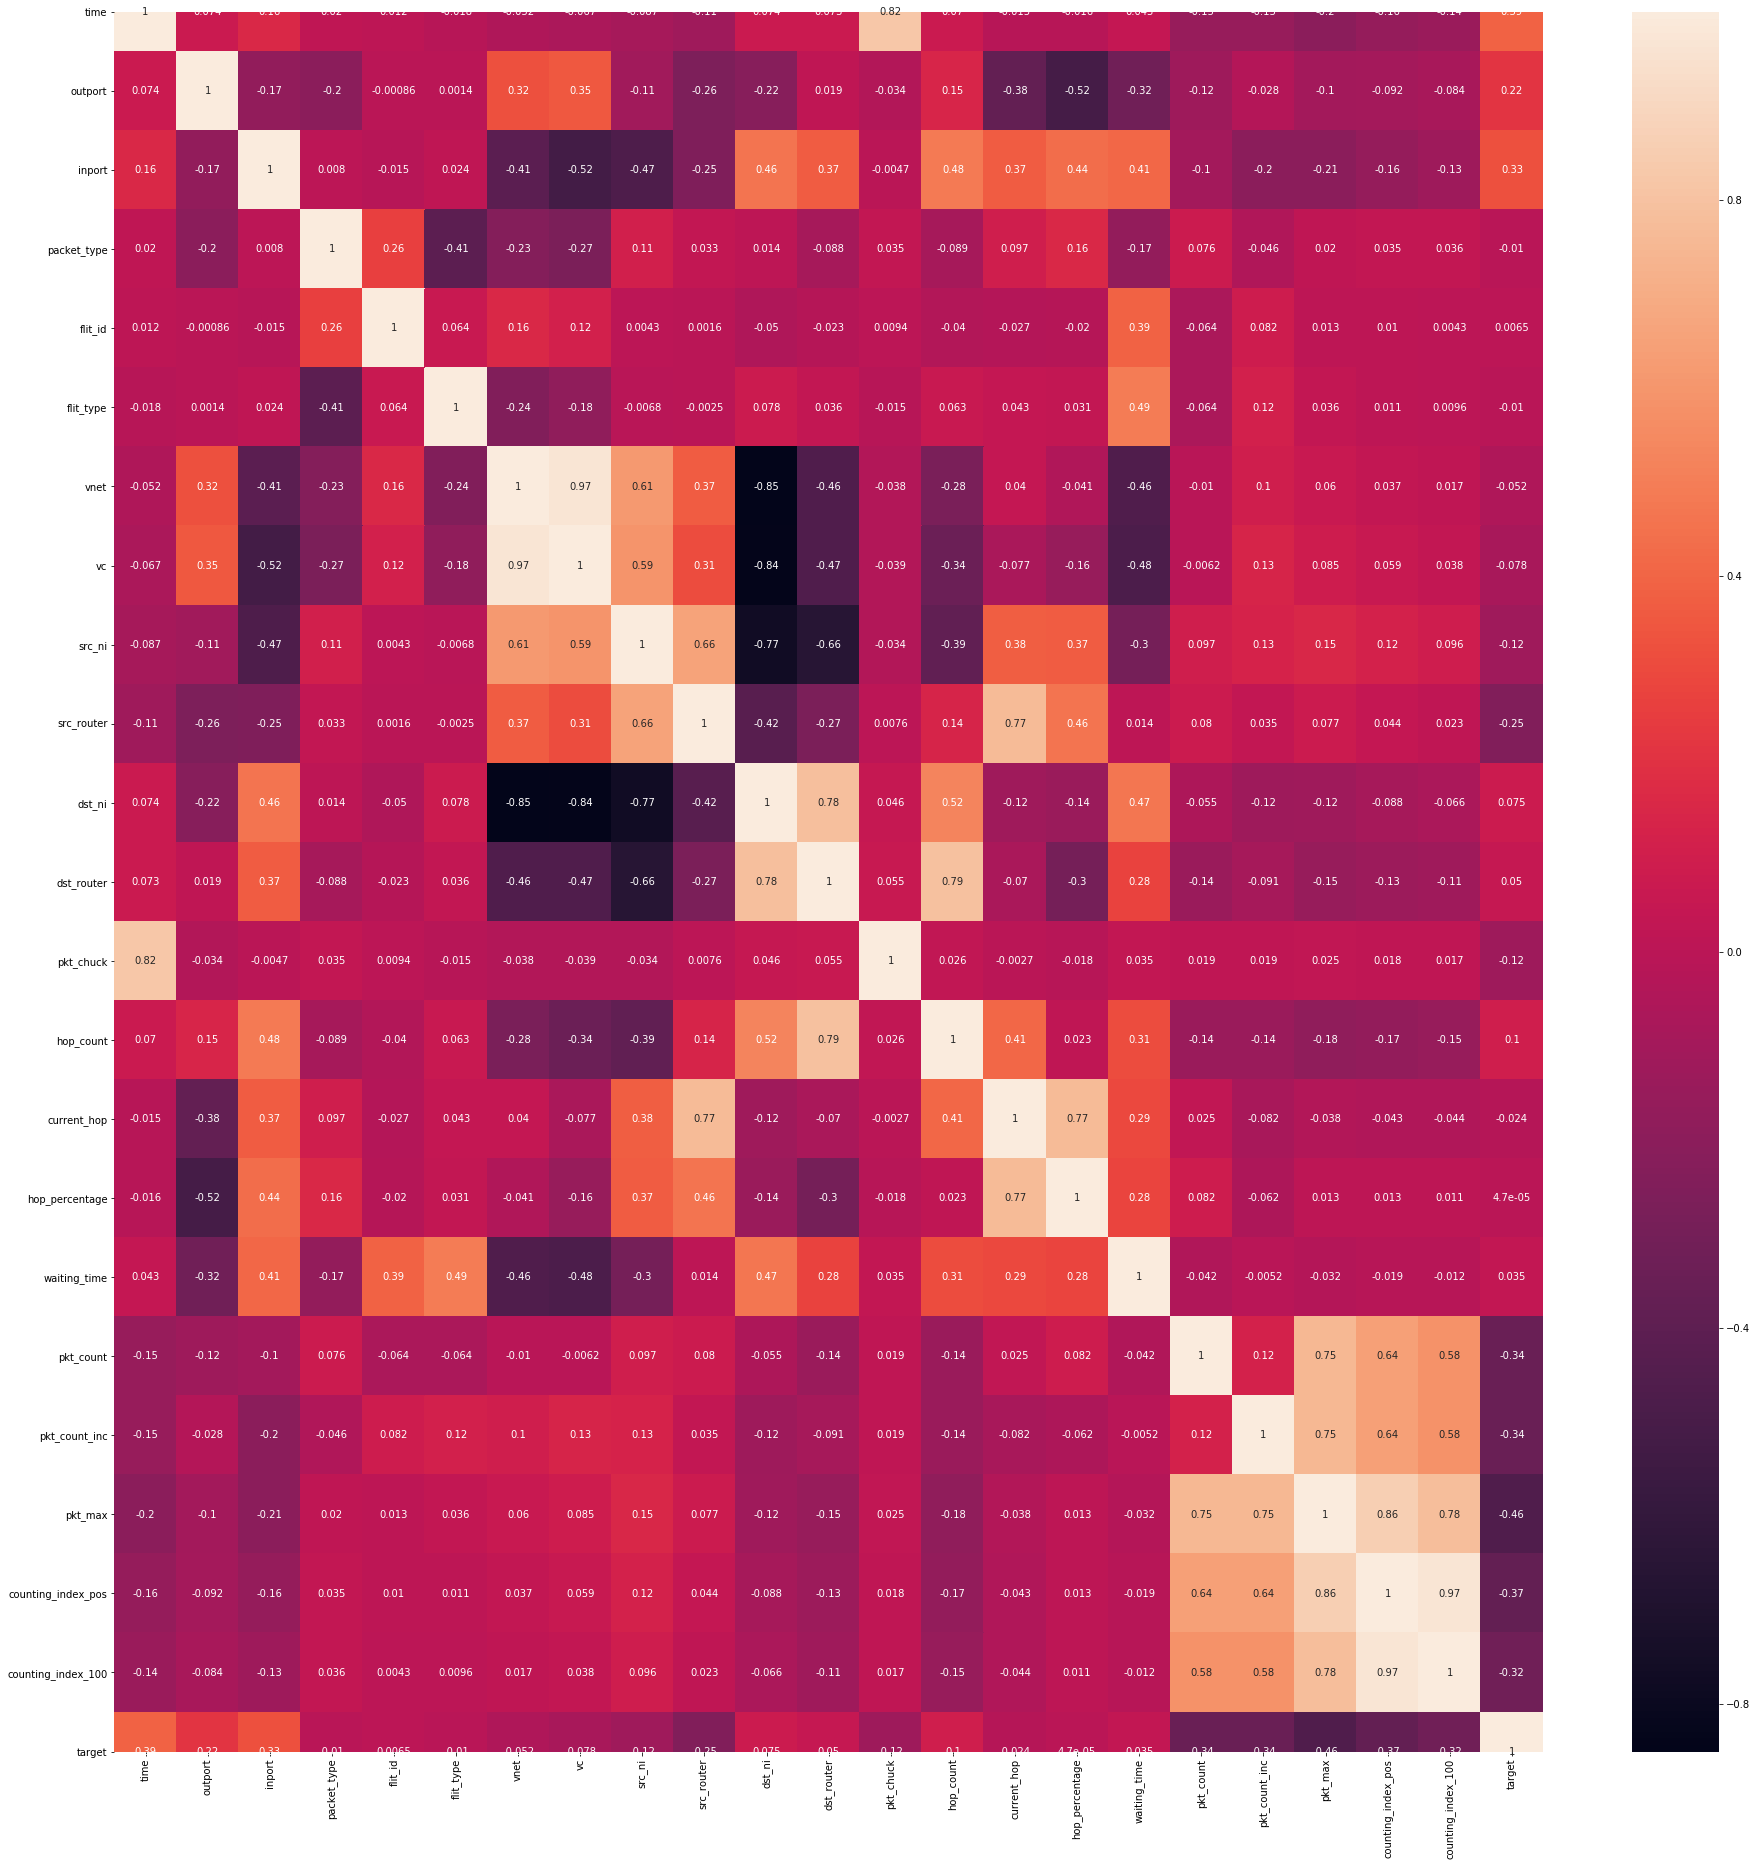

In [13]:
plt.figure(figsize=(32,32))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [14]:
train_X = df.drop(columns=['target','time'])
train_X

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,...,pkt_chuck,hop_count,current_hop,hop_percentage,waiting_time,pkt_count,pkt_count_inc,pkt_max,counting_index_pos,counting_index_100
0,2,0,0,0,3,2,8,1,1,23,...,1,3,0,0.000000,4,7,1,7,7,49
1,2,4,0,0,3,2,8,0,0,23,...,0,4,1,0.250000,8,6,2,7,12,84
2,2,4,0,0,3,2,8,0,0,23,...,0,4,1,0.250000,8,6,1,6,6,36
3,0,2,3,0,0,4,16,18,2,1,...,1,1,1,1.000000,9,5,3,7,15,105
4,0,2,3,1,1,4,16,18,2,1,...,1,1,1,1.000000,10,4,4,7,16,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121937,2,4,4,1,1,2,8,0,0,22,...,10024,3,1,0.333333,15,5,8,12,40,480
121938,2,4,4,2,1,2,8,0,0,22,...,10024,3,1,0.333333,22,4,9,12,36,432
121939,2,4,4,3,1,2,8,0,0,22,...,10024,3,1,0.333333,29,3,10,12,30,360
121940,2,4,4,4,2,2,8,0,0,22,...,10024,3,1,0.333333,36,2,11,12,22,264


In [15]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,...,pkt_chuck,hop_count,current_hop,hop_percentage,waiting_time,pkt_count,pkt_count_inc,pkt_max,counting_index_pos,counting_index_100
0,0.5,0.0,0.000000,0.00,1.000000,0.0,0.000000,0.032258,0.066667,0.741935,...,0.000090,0.500000,0.0,0.000000,0.000000,0.200000,0.000000,0.200000,0.023529,0.006049
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,...,0.000000,0.666667,0.2,0.250000,0.072727,0.166667,0.033333,0.200000,0.043137,0.010460
2,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,...,0.000000,0.666667,0.2,0.250000,0.072727,0.166667,0.000000,0.166667,0.019608,0.004411
3,0.0,0.5,0.500000,0.00,0.000000,1.0,0.727273,0.580645,0.133333,0.032258,...,0.000090,0.166667,0.2,1.000000,0.090909,0.133333,0.066667,0.200000,0.054902,0.013106
4,0.0,0.5,0.500000,0.25,0.333333,1.0,0.727273,0.580645,0.133333,0.032258,...,0.000090,0.166667,0.2,1.000000,0.109091,0.100000,0.100000,0.200000,0.058824,0.013989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121937,0.5,1.0,0.666667,0.25,0.333333,0.0,0.000000,0.000000,0.000000,0.709677,...,0.904448,0.500000,0.2,0.333333,0.200000,0.133333,0.233333,0.366667,0.152941,0.060365
121938,0.5,1.0,0.666667,0.50,0.333333,0.0,0.000000,0.000000,0.000000,0.709677,...,0.904448,0.500000,0.2,0.333333,0.327273,0.100000,0.266667,0.366667,0.137255,0.054316
121939,0.5,1.0,0.666667,0.75,0.333333,0.0,0.000000,0.000000,0.000000,0.709677,...,0.904448,0.500000,0.2,0.333333,0.454545,0.066667,0.300000,0.366667,0.113725,0.045243
121940,0.5,1.0,0.666667,1.00,0.666667,0.0,0.000000,0.000000,0.000000,0.709677,...,0.904448,0.500000,0.2,0.333333,0.581818,0.033333,0.333333,0.366667,0.082353,0.033144


In [32]:
train_X.columns

Index(['outport', 'inport', 'packet_type', 'flit_id', 'flit_type', 'vnet',
       'vc', 'src_ni', 'src_router', 'dst_ni', 'dst_router', 'pkt_chuck',
       'hop_count', 'current_hop', 'hop_percentage', 'waiting_time',
       'pkt_count', 'pkt_count_inc', 'pkt_max', 'counting_index_pos',
       'counting_index_100', 'flit_detail'],
      dtype='object')

In [16]:
train_X["flit_detail"] = train_X['flit_id'] + train_X ["flit_type"] + train_X["pkt_chuck"]
train_X

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,...,hop_count,current_hop,hop_percentage,waiting_time,pkt_count,pkt_count_inc,pkt_max,counting_index_pos,counting_index_100,flit_detail
0,0.5,0.0,0.000000,0.00,1.000000,0.0,0.000000,0.032258,0.066667,0.741935,...,0.500000,0.0,0.000000,0.000000,0.200000,0.000000,0.200000,0.023529,0.006049,1.000090
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,...,0.666667,0.2,0.250000,0.072727,0.166667,0.033333,0.200000,0.043137,0.010460,1.000000
2,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,...,0.666667,0.2,0.250000,0.072727,0.166667,0.000000,0.166667,0.019608,0.004411,1.000000
3,0.0,0.5,0.500000,0.00,0.000000,1.0,0.727273,0.580645,0.133333,0.032258,...,0.166667,0.2,1.000000,0.090909,0.133333,0.066667,0.200000,0.054902,0.013106,0.000090
4,0.0,0.5,0.500000,0.25,0.333333,1.0,0.727273,0.580645,0.133333,0.032258,...,0.166667,0.2,1.000000,0.109091,0.100000,0.100000,0.200000,0.058824,0.013989,0.583424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121937,0.5,1.0,0.666667,0.25,0.333333,0.0,0.000000,0.000000,0.000000,0.709677,...,0.500000,0.2,0.333333,0.200000,0.133333,0.233333,0.366667,0.152941,0.060365,1.487782
121938,0.5,1.0,0.666667,0.50,0.333333,0.0,0.000000,0.000000,0.000000,0.709677,...,0.500000,0.2,0.333333,0.327273,0.100000,0.266667,0.366667,0.137255,0.054316,1.737782
121939,0.5,1.0,0.666667,0.75,0.333333,0.0,0.000000,0.000000,0.000000,0.709677,...,0.500000,0.2,0.333333,0.454545,0.066667,0.300000,0.366667,0.113725,0.045243,1.987782
121940,0.5,1.0,0.666667,1.00,0.666667,0.0,0.000000,0.000000,0.000000,0.709677,...,0.500000,0.2,0.333333,0.581818,0.033333,0.333333,0.366667,0.082353,0.033144,2.571115


In [17]:
#standardization after adding combined features
x = train_X.values
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,...,hop_count,current_hop,hop_percentage,waiting_time,pkt_count,pkt_count_inc,pkt_max,counting_index_pos,counting_index_100,flit_detail
0,0.5,0.0,0.000000,0.00,1.000000,0.0,0.000000,0.032258,0.066667,0.741935,...,0.500000,0.0,0.000000,0.000000,0.200000,0.000000,0.200000,0.023529,0.006049,0.375047
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,...,0.666667,0.2,0.250000,0.072727,0.166667,0.033333,0.200000,0.043137,0.010460,0.375013
2,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,...,0.666667,0.2,0.250000,0.072727,0.166667,0.000000,0.166667,0.019608,0.004411,0.375013
3,0.0,0.5,0.500000,0.00,0.000000,1.0,0.727273,0.580645,0.133333,0.032258,...,0.166667,0.2,1.000000,0.090909,0.133333,0.066667,0.200000,0.054902,0.013106,0.000034
4,0.0,0.5,0.500000,0.25,0.333333,1.0,0.727273,0.580645,0.133333,0.032258,...,0.166667,0.2,1.000000,0.109091,0.100000,0.100000,0.200000,0.058824,0.013989,0.218791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121937,0.5,1.0,0.666667,0.25,0.333333,0.0,0.000000,0.000000,0.000000,0.709677,...,0.500000,0.2,0.333333,0.200000,0.133333,0.233333,0.366667,0.152941,0.060365,0.557937
121938,0.5,1.0,0.666667,0.50,0.333333,0.0,0.000000,0.000000,0.000000,0.709677,...,0.500000,0.2,0.333333,0.327273,0.100000,0.266667,0.366667,0.137255,0.054316,0.651690
121939,0.5,1.0,0.666667,0.75,0.333333,0.0,0.000000,0.000000,0.000000,0.709677,...,0.500000,0.2,0.333333,0.454545,0.066667,0.300000,0.366667,0.113725,0.045243,0.745443
121940,0.5,1.0,0.666667,1.00,0.666667,0.0,0.000000,0.000000,0.000000,0.709677,...,0.500000,0.2,0.333333,0.581818,0.033333,0.333333,0.366667,0.082353,0.033144,0.964201


In [18]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,...,current_hop,hop_percentage,waiting_time,pkt_count,pkt_count_inc,pkt_max,counting_index_pos,counting_index_100,flit_detail,target
outport,1.000000,-0.171157,-0.202169,-0.000862,0.001354,0.322011,0.353165,-0.108261,-0.262553,-0.220914,...,-0.378038,-0.517605,-0.321455,-0.122135,-0.027746,-0.100055,-0.091980,-0.083940,-0.016026,0.217451
inport,-0.171157,1.000000,0.008037,-0.015220,0.023905,-0.413283,-0.519151,-0.467346,-0.252382,0.464413,...,0.368555,0.435760,0.410964,-0.102964,-0.204721,-0.205400,-0.160672,-0.127414,0.001088,0.327401
packet_type,-0.202169,0.008037,1.000000,0.260563,-0.409233,-0.233214,-0.266011,0.109969,0.032884,0.013854,...,0.097141,0.158695,-0.166409,0.075646,-0.045867,0.019879,0.035161,0.035754,-0.040071,-0.010188
flit_id,-0.000862,-0.015220,0.260563,1.000000,0.063686,0.155673,0.117454,0.004319,0.001608,-0.049700,...,-0.027415,-0.020030,0.389739,-0.063662,0.082465,0.012552,0.010083,0.004281,0.692850,0.006536
flit_type,0.001354,0.023905,-0.409233,0.063686,1.000000,-0.244496,-0.184471,-0.006784,-0.002525,0.078058,...,0.043057,0.031459,0.489382,-0.064057,0.118032,0.036032,0.010854,0.009571,0.589068,-0.010265
vnet,0.322011,-0.413283,-0.233214,0.155673,-0.244496,1.000000,0.968480,0.610828,0.366666,-0.850445,...,0.039630,-0.041159,-0.460507,-0.010017,0.100551,0.060437,0.037208,0.017209,-0.051606,-0.051954
vc,0.353165,-0.519151,-0.266011,0.117454,-0.184471,0.968480,1.000000,0.589522,0.309887,-0.840416,...,-0.076519,-0.155651,-0.477648,-0.006209,0.133525,0.084992,0.059319,0.037651,-0.043902,-0.078370
src_ni,-0.108261,-0.467346,0.109969,0.004319,-0.006784,0.610828,0.589522,1.000000,0.655230,-0.766468,...,0.375855,0.365910,-0.298918,0.096626,0.129790,0.151147,0.124229,0.095636,-0.017094,-0.119746
src_router,-0.262553,-0.252382,0.032884,0.001608,-0.002525,0.366666,0.309887,0.655230,1.000000,-0.424242,...,0.768263,0.458637,0.014133,0.080274,0.035142,0.077048,0.043968,0.022547,0.003242,-0.246502
dst_ni,-0.220914,0.464413,0.013854,-0.049700,0.078058,-0.850445,-0.840416,-0.766468,-0.424242,1.000000,...,-0.115873,-0.136507,0.471400,-0.055337,-0.123264,-0.119227,-0.088151,-0.066254,0.032509,0.075179


In [19]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[-0.37613574, -0.71534277, -0.32505234, ..., -0.54732268,
         0.01637067, -0.11132633],
       [-0.80515909, -0.29755112, -0.30053733, ..., -0.39935767,
         0.24713048, -0.19414104],
       [-0.80797199, -0.29896689, -0.30273555, ..., -0.4076695 ,
         0.20481061, -0.20489532],
       ...,
       [-0.75432429, -0.10900271,  0.43629938, ...,  0.48550707,
         0.19018683,  0.04584453],
       [-0.79010964, -0.08792239,  0.873798  , ...,  0.43700149,
         0.16247021,  0.04239474],
       [-0.79115626, -0.17419656,  0.10628158, ...,  0.47990867,
         0.23005124, -0.32604188]])

In [20]:
pca.explained_variance_ratio_

array([0.34013157, 0.17374932, 0.10246214, 0.09528186, 0.06977496,
       0.04995467, 0.04228254, 0.04132606, 0.03680493])

Text(0, 0.5, 'Variance')

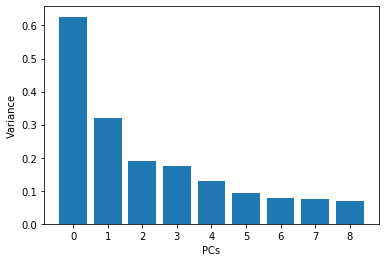

In [21]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [22]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6,7,8
0,-0.376136,-0.715343,-0.325052,0.366577,0.723258,0.116593,-0.547323,0.016371,-0.111326
1,-0.805159,-0.297551,-0.300537,-0.364173,0.741127,-0.114024,-0.399358,0.247130,-0.194141
2,-0.807972,-0.298967,-0.302736,-0.376331,0.739087,-0.119148,-0.407669,0.204811,-0.204895
3,0.809458,0.748848,-0.776480,-0.323874,-0.212446,-0.031437,-0.380145,0.189901,-0.389429
4,0.789607,0.760734,-0.367706,-0.273111,-0.047841,-0.074219,-0.415958,0.171983,-0.381967
...,...,...,...,...,...,...,...,...,...
121937,-0.736229,-0.141554,-0.105023,-0.212628,-0.092658,-0.005340,0.561492,0.193801,0.046554
121938,-0.745199,-0.125207,0.165660,-0.218208,-0.169374,-0.014258,0.523832,0.193557,0.046622
121939,-0.754324,-0.109003,0.436299,-0.224656,-0.246119,-0.023451,0.485507,0.190187,0.045845
121940,-0.790110,-0.087922,0.873798,-0.177938,-0.067850,-0.063105,0.437001,0.162470,0.042395


In [23]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,4,5,6,7,8,target
0,-0.376136,-0.715343,-0.325052,0.366577,0.723258,0.116593,-0.547323,0.016371,-0.111326,0
1,-0.805159,-0.297551,-0.300537,-0.364173,0.741127,-0.114024,-0.399358,0.247130,-0.194141,0
2,-0.807972,-0.298967,-0.302736,-0.376331,0.739087,-0.119148,-0.407669,0.204811,-0.204895,1
3,0.809458,0.748848,-0.776480,-0.323874,-0.212446,-0.031437,-0.380145,0.189901,-0.389429,0
4,0.789607,0.760734,-0.367706,-0.273111,-0.047841,-0.074219,-0.415958,0.171983,-0.381967,0
...,...,...,...,...,...,...,...,...,...,...
121937,-0.736229,-0.141554,-0.105023,-0.212628,-0.092658,-0.005340,0.561492,0.193801,0.046554,1
121938,-0.745199,-0.125207,0.165660,-0.218208,-0.169374,-0.014258,0.523832,0.193557,0.046622,1
121939,-0.754324,-0.109003,0.436299,-0.224656,-0.246119,-0.023451,0.485507,0.190187,0.045845,1
121940,-0.790110,-0.087922,0.873798,-0.177938,-0.067850,-0.063105,0.437001,0.162470,0.042395,1


In [24]:
final_df.corr()

,0,1,2,3,4,5,6,7,8,target
0,1.000000e+00,1.225702e-15,4.295816e-17,6.305120e-16,-1.164499e-15,1.637908e-16,-1.261307e-16,4.357534e-16,-3.547086e-15,-0.129136
1,1.225702e-15,1.000000e+00,2.267424e-16,-9.840988e-16,8.231564e-16,2.110762e-15,-4.650997e-16,3.294062e-17,2.251944e-15,-0.076770
2,4.295816e-17,2.267424e-16,1.000000e+00,6.426657e-16,-3.212819e-16,5.711427e-16,-9.992835e-16,1.981311e-16,-2.860329e-16,-0.015727
3,6.305120e-16,-9.840988e-16,6.426657e-16,1.000000e+00,1.052825e-15,-2.128132e-15,8.297465e-16,1.255231e-16,1.573154e-15,-0.367021
4,-1.164499e-15,8.231564e-16,-3.212819e-16,1.052825e-15,1.000000e+00,8.220361e-16,-6.180669e-16,-1.387092e-16,-1.114422e-15,-0.005343
5,1.637908e-16,2.110762e-15,5.711427e-16,-2.128132e-15,8.220361e-16,1.000000e+00,9.085654e-16,2.387737e-16,7.449765e-16,-0.315994
6,-1.261307e-16,-4.650997e-16,-9.992835e-16,8.297465e-16,-6.180669e-16,9.085654e-16,1.000000e+00,-7.138097e-16,-5.190012e-18,-0.078532
7,4.357534e-16,3.294062e-17,1.981311e-16,1.255231e-16,-1.387092e-16,2.387737e-16,-7.138097e-16,1.000000e+00,-3.908720e-16,-0.271630
8,-3.547086e-15,2.251944e-15,-2.860329e-16,1.573154e-15,-1.114422e-15,7.449765e-16,-5.190012e-18,-3.908720e-16,1.000000e+00,-0.045733
target,-1.291365e-01,-7.677046e-02,-1.572710e-02,-3.670213e-01,-5.342992e-03,-3.159942e-01,-7.853162e-02,-2.716299e-01,-4.573296e-02,1.000000


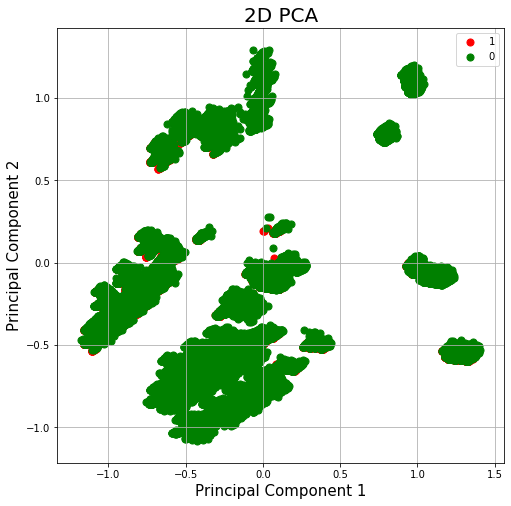

In [25]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [26]:
train_Y = df['target']

In [27]:
train_Y.value_counts()

0    71841
1    50101
Name: target, dtype: int64

In [28]:
seed = 7
np.random.seed(seed)

#### machine learning models

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [30]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.32, random_state=seed, shuffle=True)

                 Specs        Score
18             pkt_max  3749.055511
1               inport  3428.894017
17       pkt_count_inc  1874.627505
16           pkt_count  1874.429537
19  counting_index_pos  1866.005561
8           src_router  1854.944041
0              outport  1438.952258
20  counting_index_100  1292.929900
7               src_ni   314.797696
6                   vc   210.226805
11           pkt_chuck   174.617205
12           hop_count   138.017022
5                 vnet   136.725387
9               dst_ni   113.091929
10          dst_router    71.109565
21         flit_detail    25.446427
15        waiting_time    12.622823


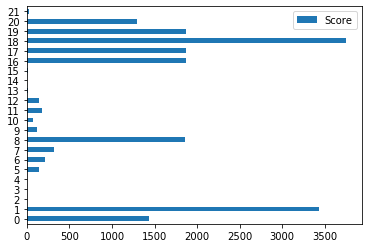

In [31]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

In [30]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [31]:
logit_model=sm.Logit(train_Y,train_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.413129
         Iterations 19


C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                                  Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.390      
Dependent Variable:        target                AIC:                   100795.5189
Date:                      2020-05-05 21:40      BIC:                   100989.7450
No. Observations:          121942                Log-Likelihood:        -50378.    
Df Model:                  19                    LL-Null:               -82575.    
Df Residuals:              121922                LLR p-value:           0.0000     
Converged:                 1.0000                Scale:                 1.0000     
No. Iterations:            19.0000                                                 
-----------------------------------------------------------------------------------
                    Coef.     Std.Err.      z     P>|z|      [0.025       0.975]   
-----------------------------------------------------------------------------------
outport              2.7049

In [32]:
logreg = LogisticRegression(C=1,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 81.13603473227207
Test Prediction  81.37717185177593


In [34]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
13,current_hop,6.817248
7,src_ni,5.045220
9,dst_ni,2.931369
19,counting_index_pos,2.894892
0,outport,2.599341
1,inport,2.419290
15,waiting_time,1.346596
6,vc,0.605756
2,packet_type,0.594600
5,vnet,0.084677


In [35]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18719  4329]
 [ 2938 13036]]


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84     23048
           1       0.75      0.82      0.78     15974

    accuracy                           0.81     39022
   macro avg       0.81      0.81      0.81     39022
weighted avg       0.82      0.81      0.81     39022



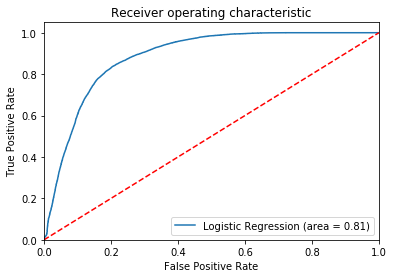

In [37]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

In [38]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
y_pred_knn= knn.predict(X_test)

In [40]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 90.67414375301496
Test Prediction  86.82538055455896


In [41]:
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

[[19691  3357]
 [ 1784 14190]]


In [42]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88     23048
           1       0.81      0.89      0.85     15974

    accuracy                           0.87     39022
   macro avg       0.86      0.87      0.87     39022
weighted avg       0.87      0.87      0.87     39022



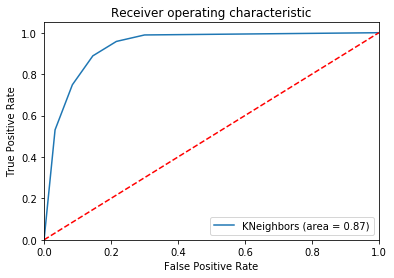

In [43]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

In [44]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [45]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [46]:
y_pred_nb= nb.predict(X_test)

In [47]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 69.76483357452967
Test Prediction Score 69.75039721182922


In [48]:
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)

[[13515  9533]
 [ 2271 13703]]


In [49]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.86      0.59      0.70     23048
           1       0.59      0.86      0.70     15974

    accuracy                           0.70     39022
   macro avg       0.72      0.72      0.70     39022
weighted avg       0.75      0.70      0.70     39022



In [50]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.optimizers import SGD

Using TensorFlow backend.


In [51]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 66336 samples, validate on 16584 samples
Epoch 1/10
66336/66336 [==============================] - 7s 100us/step - loss: 0.5194 - accuracy: 0.7523 - val_loss: 0.4505 - val_accuracy: 0.7981
Epoch 2/10
66336/66336 [==============================] - 6s 93us/step - loss: 0.4437 - accuracy: 0.8022 - val_loss: 0.4350 - val_accuracy: 0.8087
Epoch 3/10
66336/66336 [==============================] - 6s 94us/step - loss: 0.4327 - accuracy: 0.8071 - val_loss: 0.4268 - val_accuracy: 0.8092
Epoch 4/10
66336/66336 [==============================] - 6s 90us/step - loss: 0.4269 - accuracy: 0.8098 - val_loss: 0.4228 - val_accuracy: 0.8113
Epoch 5/10
66336/66336 [==============================] - 6s 93us/step - loss: 0.4238 - accuracy: 0.8112 - val_loss: 0.4205 - val_accuracy: 0.8089
Epoch 6/10
66336/66336 [==============================] - 6s 96us/step - loss: 0.4221 - accuracy: 0.8110 - val_loss: 0.4189 - val_accuracy: 0.8117
Epoch 7/10
66336/66336 [==============================] - 6s 91us/s

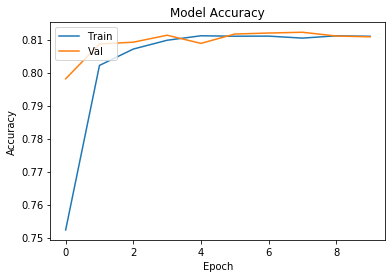

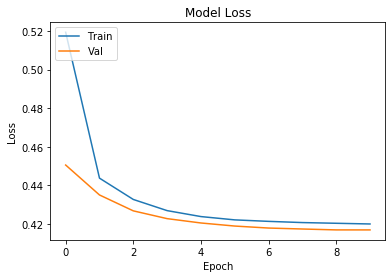

In [53]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [54]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 81.34%


In [55]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(4, activation='relu', input_shape=(n_cols,)))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 66336 samples, validate on 16584 samples
Epoch 1/10
66336/66336 [==============================] - 5s 76us/step - loss: 0.2440 - accuracy: 0.5749 - val_loss: 0.2413 - val_accuracy: 0.5908
Epoch 2/10
66336/66336 [==============================] - 5s 73us/step - loss: 0.2414 - accuracy: 0.5879 - val_loss: 0.2405 - val_accuracy: 0.5908
Epoch 3/10
66336/66336 [==============================] - 5s 68us/step - loss: 0.2401 - accuracy: 0.5879 - val_loss: 0.2385 - val_accuracy: 0.5908
Epoch 4/10
66336/66336 [==============================] - 7s 103us/step - loss: 0.2358 - accuracy: 0.5879 - val_loss: 0.2303 - val_accuracy: 0.5908
Epoch 5/10
66336/66336 [==============================] - 5s 77us/step - loss: 0.2166 - accuracy: 0.5972 - val_loss: 0.1970 - val_accuracy: 0.6927
Epoch 6/10
66336/66336 [==============================] - 6s 84us/step - loss: 0.1780 - accuracy: 0.7711 - val_loss: 0.1629 - val_accuracy: 0.7981
Epoch 7/10
66336/66336 [==============================] - 5s 79us/s

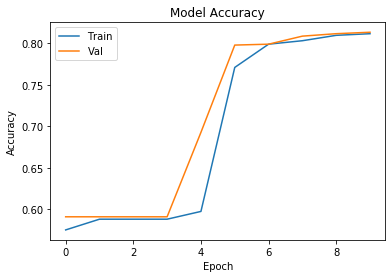

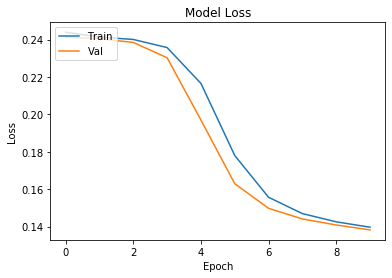

In [56]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [57]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 81.47%


In [58]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 66336 samples, validate on 16584 samples
Epoch 1/10
66336/66336 [==============================] - 7s 101us/step - loss: 0.2246 - accuracy: 0.6546 - val_loss: 0.1997 - val_accuracy: 0.7272
Epoch 2/10
66336/66336 [==============================] - 5s 78us/step - loss: 0.1756 - accuracy: 0.7455 - val_loss: 0.1552 - val_accuracy: 0.7996
Epoch 3/10
66336/66336 [==============================] - 7s 100us/step - loss: 0.1448 - accuracy: 0.8088 - val_loss: 0.1391 - val_accuracy: 0.8101
Epoch 4/10
66336/66336 [==============================] - 6s 88us/step - loss: 0.1368 - accuracy: 0.8143 - val_loss: 0.1343 - val_accuracy: 0.8171
Epoch 5/10
66336/66336 [==============================] - 6s 83us/step - loss: 0.1333 - accuracy: 0.8163 - val_loss: 0.1317 - val_accuracy: 0.8160
Epoch 6/10
66336/66336 [==============================] - 6s 93us/step - loss: 0.1311 - accuracy: 0.8178 - val_loss: 0.1298 - val_accuracy: 0.8163
Epoch 7/10
66336/66336 [==============================] - 5s 78us/

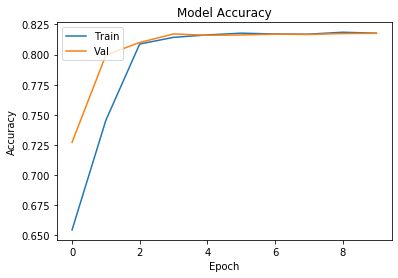

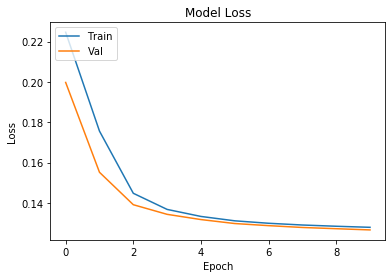

In [59]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [60]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 82.03%


In [62]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2)

Train on 66336 samples, validate on 16584 samples
Epoch 1/200
66336/66336 [==============================] - 14s 207us/step - loss: 0.1340 - accuracy: 0.8058 - val_loss: 0.1213 - val_accuracy: 0.8220
Epoch 2/200
66336/66336 [==============================] - 10s 152us/step - loss: 0.1216 - accuracy: 0.8201 - val_loss: 0.1135 - val_accuracy: 0.8309
Epoch 3/200
66336/66336 [==============================] - 10s 150us/step - loss: 0.1169 - accuracy: 0.8269 - val_loss: 0.1088 - val_accuracy: 0.8403
Epoch 4/200
66336/66336 [==============================] - 11s 163us/step - loss: 0.1132 - accuracy: 0.8324 - val_loss: 0.1055 - val_accuracy: 0.8461
Epoch 5/200
66336/66336 [==============================] - 10s 149us/step - loss: 0.1111 - accuracy: 0.8372 - val_loss: 0.1044 - val_accuracy: 0.8469
Epoch 6/200
66336/66336 [==============================] - 12s 174us/step - loss: 0.1103 - accuracy: 0.8382 - val_loss: 0.1024 - val_accuracy: 0.8546
Epoch 7/200
66336/66336 [=========================

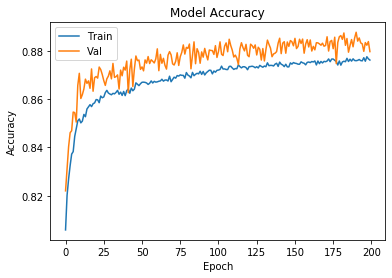

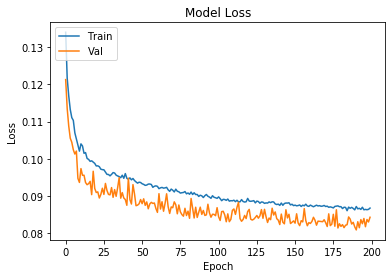

In [63]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [65]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 86.93%


In [66]:
principal_df[principal_df.duplicated()].shape

(167, 9)

In [67]:
train_X[train_X.duplicated()].shape

(167, 22)

In [68]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [69]:
# GridSearchCV
param_grid={'max_depth':range(0,21,2) ,
            'max_features':range(0,21,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 20, 'max_features': 20}
Accuracy : 0.9270019295706705


In [73]:
dt = DecisionTreeClassifier(max_depth=21,max_features=21,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=21, max_features=21, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [74]:
y_pred_dt= dt.predict(X_test)

In [75]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 98.12711046792089
Test Prediction Score 94.41853313515452


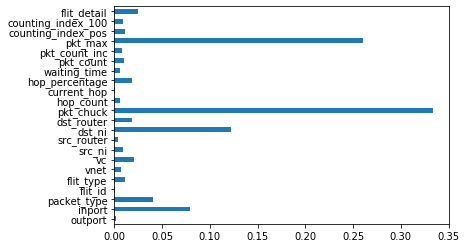

In [77]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

In [78]:
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)

[[21761  1287]
 [  891 15083]]


In [79]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     23048
           1       0.92      0.94      0.93     15974

    accuracy                           0.94     39022
   macro avg       0.94      0.94      0.94     39022
weighted avg       0.94      0.94      0.94     39022



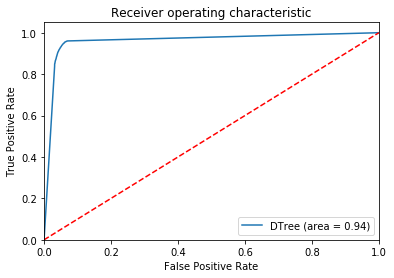

In [80]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

In [82]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# GridSearchCV
param_grid={'max_depth':range(0,21,2),
            'n_estimators':[125,250],
            'max_features':range(0,21,2)}
dt_g=RandomForestClassifier(random_state=42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

In [83]:
rf = RandomForestClassifier(max_depth=21,max_features=21,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=21, max_features=21,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [85]:
y_pred_rf= rf.predict(X_test)

In [86]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 99.09430776652195
Test Prediction Score 94.73117728460868


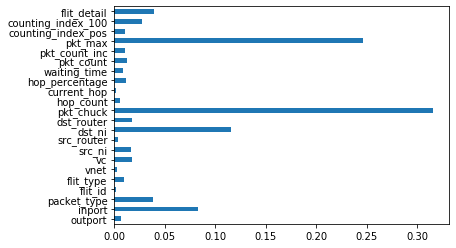

In [87]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

In [88]:
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

[[21595  1453]
 [  603 15371]]


In [89]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     23048
           1       0.91      0.96      0.94     15974

    accuracy                           0.95     39022
   macro avg       0.94      0.95      0.95     39022
weighted avg       0.95      0.95      0.95     39022



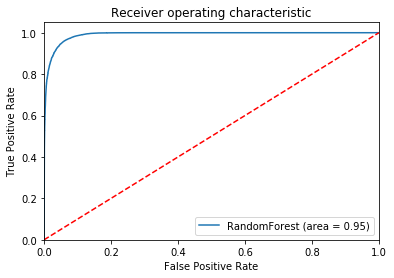

In [90]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [91]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [ ]:
# GridSearchCV
param_grid={'max_depth':range(0,17,2),
            'n_estimators':[125,250],
           'min_child_weight':[1,3,6]}
xgb_g=XGBClassifier(random_state=42)
xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
xgb_cv.fit(X_train,y_train)

print("Best parameters:",xgb_cv.best_params_)
print("Accuracy :",xgb_cv.best_score_)

In [95]:
xgbc = XGBClassifier(max_depth=21,min_child_weight=1,n_estimators=500,random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=21,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [96]:
y_pred_xgbc= xgbc.predict(X_test)

In [97]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.9035214664737
Test Prediction Score 97.08882169032853


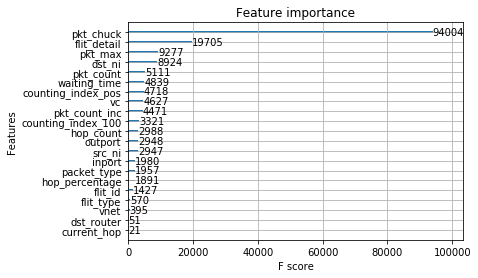

In [98]:
plot_importance(xgbc)
plt.show()

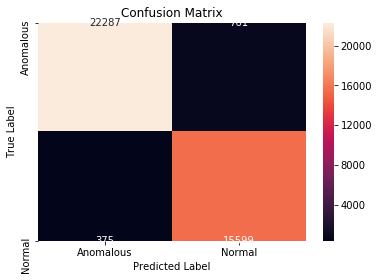

In [99]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [100]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     23048
           1       0.95      0.98      0.96     15974

    accuracy                           0.97     39022
   macro avg       0.97      0.97      0.97     39022
weighted avg       0.97      0.97      0.97     39022



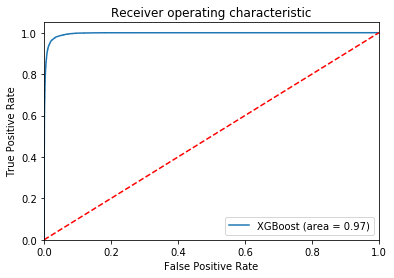

In [101]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

In [ ]:
#supportvectormachines
from sklearn.svm import SVC

In [ ]:
ksvc = SVC(kernel = 'rbf',random_state = 42,probability=True)
ksvc.fit(X_train,y_train)

In [ ]:
y_pred_ksvc= ksvc.predict(X_test)

In [ ]:
ksvc_score_train = ksvc.score(X_train,y_train)
print("Train Prediction Score",ksvc_score_train*100)
ksvc_score_test = accuracy_score(y_test,y_pred_ksvc)
print("Test Prediction Score",ksvc_score_test*100)

In [ ]:
cm = confusion_matrix(y_test, y_pred_ksvc)
print(cm)

In [ ]:
print(classification_report(y_test,y_pred_ksvc))

In [ ]:
kscv_roc_auc = roc_auc_score(y_test, y_pred_ksvc)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KSVC (area = %0.2f)' % kscv_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KSVC_ROC')
plt.show()

In [102]:
#lightgbm
import lightgbm as lgb

In [65]:
# GridSearchCV
param_grid = {'n_estimators': [x for x in range(24,40,2)],
              'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
lgb_g = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)
lgb_cv = GridSearchCV(lgb_g, param_grid,cv=10)
lgb_cv.fit(X_train, y_train)

print("Best parameters:",lgb_cv.best_params_)
print("Accuracy :",lgb_cv.best_score_)

Best parameters: {'learning_rate': 0.2, 'n_estimators': 38}
Accuracy : 0.9121924746743849


In [106]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2,  n_estimators = 500, max_depth = 21, random_state=42, min_child_weight=1,metric='l2')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=21,
               metric='l2', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [107]:
y_pred_gbm= gbm.predict(X_test)

In [108]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 96.03232030873131
Test Prediction Score 93.42165957664908


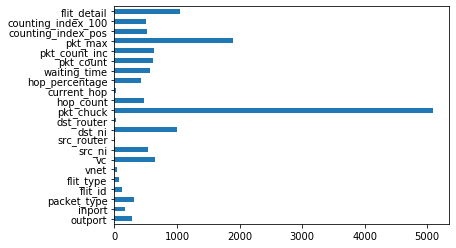

In [110]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

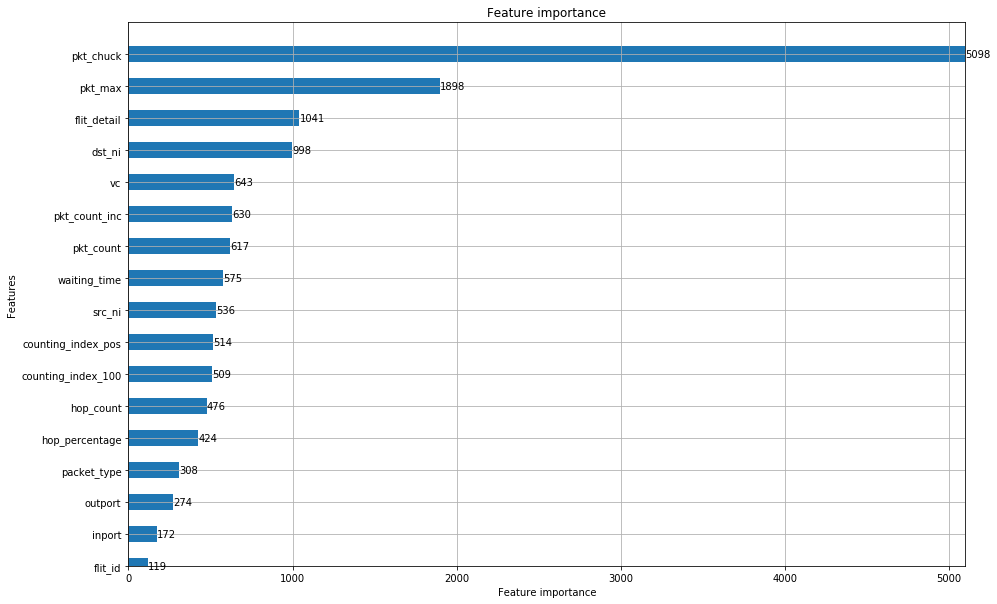

In [113]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,5100), ylim = (0,17), figsize = (15,10))
plt.show()

In [114]:
sorted(gbm.feature_importances_,reverse=True)

[5098,
 1898,
 1041,
 998,
 643,
 630,
 617,
 575,
 536,
 514,
 509,
 476,
 424,
 308,
 274,
 172,
 119,
 68,
 44,
 23,
 20,
 13]

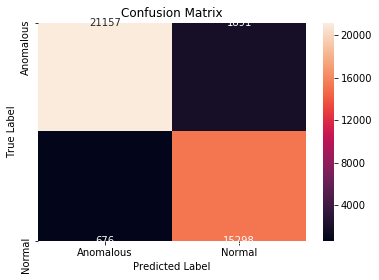

In [115]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [116]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     23048
           1       0.89      0.96      0.92     15974

    accuracy                           0.93     39022
   macro avg       0.93      0.94      0.93     39022
weighted avg       0.94      0.93      0.93     39022



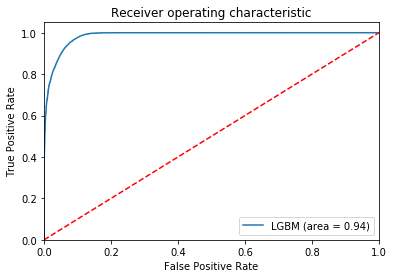

In [117]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()